#XGBOOST Classifier


In [46]:
# plot learning curve of an xgboost model
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
from random import randint
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [47]:
#Model function xgboostClassifier
def myModel(X , y):
  # split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
  # define the model
  model = XGBClassifier(n_estimators=700, eta=0.01, subsample=0.5, colsample_bytree=0.5)
  # define the datasets to evaluate each iteration
  evalset = [(X_train, y_train), (X_test,y_test)]
  # fit the model
  model.fit(X_train, y_train, eval_metric=['error','logloss'], eval_set=evalset)
  # evaluate performance
  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print('Accuracy: %.3f' % score)
  # retrieve performance metrics
  results = model.evals_result()
  # plot learning curves
  pyplot.plot(results['validation_0']['logloss'], label='train')
  pyplot.plot(results['validation_1']['logloss'], label='test')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

  pyplot.plot(results['validation_0']['error'], label='Train')
  pyplot.plot(results['validation_1']['error'], label='Test')
  pyplot.legend()
  pyplot.ylabel('Classification Error')
  pyplot.title('XGBoost Classification Error')
  pyplot.show()
  return y_test, y_pred, model

In [48]:
#Statistic information per model
def stat(y_test, y_pred):
  #mae = mae(y_test,y_pred)
  #mse = mean_squared_error(y_test,y_pred)
  #print("MSE: %.2f" % mse)
  #print("RMSE: %.2f" % np.sqrt(mse))
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test,y_pred)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_test,y_pred)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test,y_pred)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test,y_pred)
  print('F1 score: %f' % f1)
  # ROC AUC
  auc = roc_auc_score(y_test,y_pred)
  print('ROC AUC: %f' % auc)
  # confusion matrix
  matrix = confusion_matrix(y_test,y_pred)
  print(matrix)

In [1]:
#function for prediction the bus station time
def findDFtime(hr,min,st):
  cnt = 1
  df_predicted = pd.DataFrame(columns=['WeekDay','Hours','Minutes','Seconds','Line','Station'])
  list = [model_o2,model_o3,model_o4,model_o5,model_o6,model_o7,model_o8,model_o9,model_o10,model_o11,model_o12,model_o13]
  if min + 20 >59:
    nH = hr + 2
  if min + 20 <60:
    nH = hr + 1
  for h in range(hr,nH):
    if h == nH-1 and min+20 > 59:
      min = 0
    for m in range(min,60):
      for s in range(0,60):
        cnt = 1
        arr = [h,m,s,0,0,1,0,0]
        for obj in list:
          cnt = cnt + 1
          if (obj.predict(np.array(arr).reshape((1,-1)))[0] == 1):
            if cnt == st and m < min+20:
              #print(h,m,s,cnt)
              df_predicted = df_predicted.append({'WeekDay':'Tue',
                                                  'Hours':h,
                                                  'Minutes':m,
                                                  'Seconds':s,
                                                  'Line':921,
                                                  'Station':cnt },ignore_index=True)
  #get 1 random row from df_predicted data
  value = randint(0, df_predicted.shape[0]-1)
  print(value)
  df_val = df_predicted.loc[[value]]           
  return df_val            

#Data Prepare

In [50]:
#File load
dfbus = pd.read_excel('final_CLS.xls', index_col=0)
dfbus

,WeekDay,A_Hours,A_Minutes,A_Seconds,PublishedLineName,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13
0,Sun,9,2,19,921,1,0,0,0,0,0,0,0,0,0,0,0
1,Sun,9,3,45,921,0,1,0,0,0,0,0,0,0,0,0,0
2,Sun,9,4,25,921,0,0,1,0,0,0,0,0,0,0,0,0
3,Sun,9,6,58,921,0,0,0,1,0,0,0,0,0,0,0,0
4,Sun,9,8,17,921,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19519,Tue,22,8,48,921,0,0,0,0,0,0,0,1,0,0,0,0
19520,Tue,22,9,36,921,0,0,0,0,0,0,0,0,1,0,0,0
19521,Tue,22,10,10,921,0,0,0,0,0,0,0,0,0,1,0,0
19522,Tue,22,10,51,921,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
#Dummy for weekday
dfbus = dfbus.join(pd.get_dummies(dfbus['WeekDay']))
dfbus

,WeekDay,A_Hours,A_Minutes,A_Seconds,PublishedLineName,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,Mon,Sun,Thu,Tue,Wed
0,Sun,9,2,19,921,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Sun,9,3,45,921,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Sun,9,4,25,921,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Sun,9,6,58,921,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Sun,9,8,17,921,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19519,Tue,22,8,48,921,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19520,Tue,22,9,36,921,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
19521,Tue,22,10,10,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
19522,Tue,22,10,51,921,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [52]:
#array of the columns names and X input models
out_columns = ['o2','o3','o4','o5','o6','o7','o8','o9','o10','o11','o12','o13']
X = dfbus[['A_Hours',	'A_Minutes','A_Seconds','Sun','Mon','Tue','Wed','Thu']].values


#Build models for each station from o2 to o13

[0]	validation_0-error:0.066201	validation_0-logloss:0.619254	validation_1-error:0.070679	validation_1-logloss:0.619531
[1]	validation_0-error:0.082464	validation_0-logloss:0.564857	validation_1-error:0.086812	validation_1-logloss:0.565868
[2]	validation_0-error:0.071451	validation_0-logloss:0.513578	validation_1-error:0.080666	validation_1-logloss:0.514851
[3]	validation_0-error:0.071451	validation_0-logloss:0.475921	validation_1-error:0.080666	validation_1-logloss:0.477768
[4]	validation_0-error:0.082464	validation_0-logloss:0.44463	validation_1-error:0.086812	validation_1-logloss:0.447029
[5]	validation_0-error:0.082464	validation_0-logloss:0.412625	validation_1-error:0.086812	validation_1-logloss:0.415002
[6]	validation_0-error:0.071451	validation_0-logloss:0.384636	validation_1-error:0.080666	validation_1-logloss:0.387233
[7]	validation_0-error:0.082464	validation_0-logloss:0.365278	validation_1-error:0.086812	validation_1-logloss:0.36828
[8]	validation_0-error:0.071451	validation

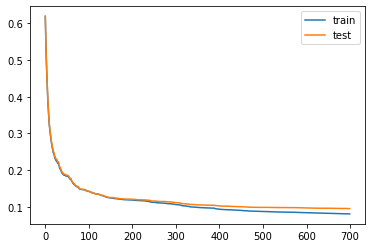

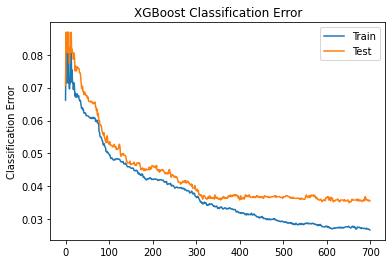

Accuracy: 0.964405
Precision: 0.875940
Recall: 0.687316
F1 score: 0.770248
ROC AUC: 0.839031
[[3533   33]
 [ 106  233]]


In [53]:
#Station 2 model
y = dfbus['o2'].values
y_test, y_pred, model_o2 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.077598	validation_0-logloss:0.623141	validation_1-error:0.071959	validation_1-logloss:0.622906
[1]	validation_0-error:0.084512	validation_0-logloss:0.569347	validation_1-error:0.078617	validation_1-logloss:0.568159
[2]	validation_0-error:0.077598	validation_0-logloss:0.521078	validation_1-error:0.071959	validation_1-logloss:0.519909
[3]	validation_0-error:0.084512	validation_0-logloss:0.484141	validation_1-error:0.078617	validation_1-logloss:0.482179
[4]	validation_0-error:0.084512	validation_0-logloss:0.453228	validation_1-error:0.078617	validation_1-logloss:0.450607
[5]	validation_0-error:0.084512	validation_0-logloss:0.423163	validation_1-error:0.078617	validation_1-logloss:0.420493
[6]	validation_0-error:0.077598	validation_0-logloss:0.397888	validation_1-error:0.071959	validation_1-logloss:0.395238
[7]	validation_0-error:0.084512	validation_0-logloss:0.378766	validation_1-error:0.078617	validation_1-logloss:0.375532
[8]	validation_0-error:0.077598	validati

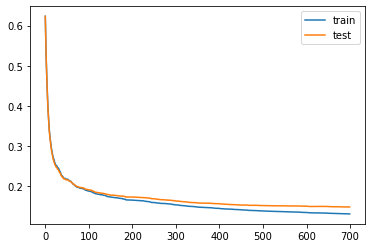

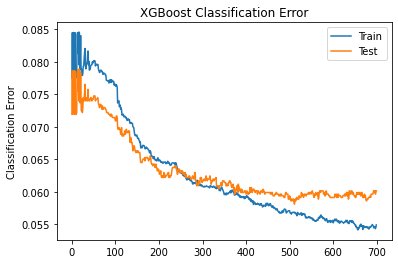

Accuracy: 0.939821
Precision: 0.695652
Recall: 0.416938
F1 score: 0.521385
ROC AUC: 0.700687
[[3542   56]
 [ 179  128]]


In [54]:
#Station 3 model
y = dfbus['o3'].values
y_test, y_pred,model_o3 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.083552	validation_0-logloss:0.623742	validation_1-error:0.082458	validation_1-logloss:0.62382
[1]	validation_0-error:0.083552	validation_0-logloss:0.569683	validation_1-error:0.082458	validation_1-logloss:0.569547
[2]	validation_0-error:0.083552	validation_0-logloss:0.521401	validation_1-error:0.082458	validation_1-logloss:0.521351
[3]	validation_0-error:0.083552	validation_0-logloss:0.48423	validation_1-error:0.082458	validation_1-logloss:0.484006
[4]	validation_0-error:0.083552	validation_0-logloss:0.453	validation_1-error:0.082458	validation_1-logloss:0.452644
[5]	validation_0-error:0.083552	validation_0-logloss:0.422927	validation_1-error:0.082458	validation_1-logloss:0.422619
[6]	validation_0-error:0.083552	validation_0-logloss:0.396828	validation_1-error:0.082458	validation_1-logloss:0.39661
[7]	validation_0-error:0.083552	validation_0-logloss:0.377636	validation_1-error:0.082458	validation_1-logloss:0.377285
[8]	validation_0-error:0.083552	validation_0-l

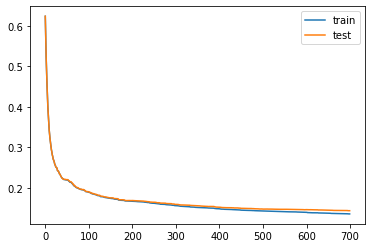

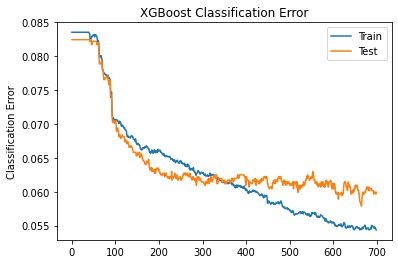

Accuracy: 0.940077
Precision: 0.739130
Recall: 0.422360
F1 score: 0.537549
ROC AUC: 0.704482
[[3535   48]
 [ 186  136]]


In [55]:
#Station 4 model
y = dfbus['o4'].values
y_test, y_pred, model_o4 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.081119	validation_0-logloss:0.624261	validation_1-error:0.076312	validation_1-logloss:0.623783
[1]	validation_0-error:0.083872	validation_0-logloss:0.571099	validation_1-error:0.081178	validation_1-logloss:0.570262
[2]	validation_0-error:0.077854	validation_0-logloss:0.523716	validation_1-error:0.074776	validation_1-logloss:0.522651
[3]	validation_0-error:0.083872	validation_0-logloss:0.486455	validation_1-error:0.081178	validation_1-logloss:0.484973
[4]	validation_0-error:0.083872	validation_0-logloss:0.455439	validation_1-error:0.081178	validation_1-logloss:0.453713
[5]	validation_0-error:0.083872	validation_0-logloss:0.426184	validation_1-error:0.081178	validation_1-logloss:0.424389
[6]	validation_0-error:0.077854	validation_0-logloss:0.40095	validation_1-error:0.074776	validation_1-logloss:0.39888
[7]	validation_0-error:0.083872	validation_0-logloss:0.381914	validation_1-error:0.081178	validation_1-logloss:0.37955
[8]	validation_0-error:0.077854	validation_

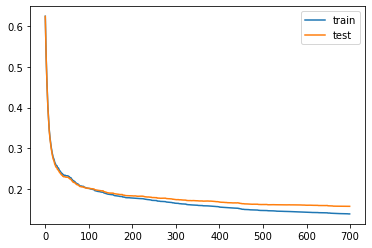

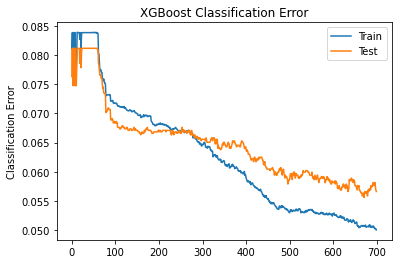

Accuracy: 0.943406
Precision: 0.811688
Recall: 0.394322
F1 score: 0.530786
ROC AUC: 0.693120
[[3559   29]
 [ 192  125]]


In [56]:
#Station 5 model
y = dfbus['o5'].values
y_test, y_pred, model_o5 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.082976	validation_0-logloss:0.625992	validation_1-error:0.084763	validation_1-logloss:0.626045
[1]	validation_0-error:0.082976	validation_0-logloss:0.572228	validation_1-error:0.084763	validation_1-logloss:0.572527
[2]	validation_0-error:0.082976	validation_0-logloss:0.526636	validation_1-error:0.084763	validation_1-logloss:0.527287
[3]	validation_0-error:0.082976	validation_0-logloss:0.48897	validation_1-error:0.084763	validation_1-logloss:0.489837
[4]	validation_0-error:0.082976	validation_0-logloss:0.457615	validation_1-error:0.084763	validation_1-logloss:0.45874
[5]	validation_0-error:0.082976	validation_0-logloss:0.430821	validation_1-error:0.084763	validation_1-logloss:0.431956
[6]	validation_0-error:0.082976	validation_0-logloss:0.408143	validation_1-error:0.084763	validation_1-logloss:0.40952
[7]	validation_0-error:0.082976	validation_0-logloss:0.389408	validation_1-error:0.084763	validation_1-logloss:0.391053
[8]	validation_0-error:0.082976	validation_

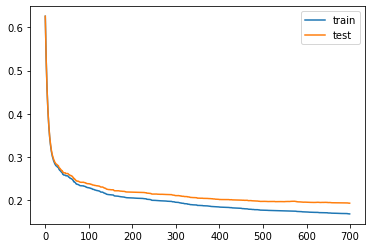

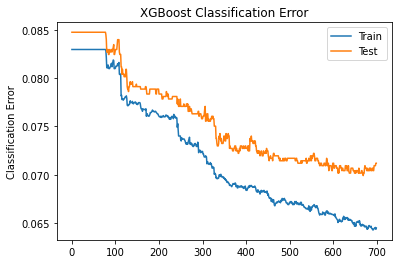

Accuracy: 0.928809
Precision: 0.773196
Recall: 0.226586
F1 score: 0.350467
ROC AUC: 0.610215
[[3552   22]
 [ 256   75]]


In [57]:
#Station 6 model
y = dfbus['o6'].values
y_test, y_pred, model_o6= myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.081759	validation_0-logloss:0.625857	validation_1-error:0.089629	validation_1-logloss:0.627482
[1]	validation_0-error:0.081759	validation_0-logloss:0.571556	validation_1-error:0.089629	validation_1-logloss:0.574338
[2]	validation_0-error:0.081759	validation_0-logloss:0.525771	validation_1-error:0.089629	validation_1-logloss:0.529647
[3]	validation_0-error:0.081759	validation_0-logloss:0.488327	validation_1-error:0.089629	validation_1-logloss:0.493278
[4]	validation_0-error:0.081759	validation_0-logloss:0.457249	validation_1-error:0.089629	validation_1-logloss:0.463067
[5]	validation_0-error:0.081759	validation_0-logloss:0.42969	validation_1-error:0.089629	validation_1-logloss:0.436559
[6]	validation_0-error:0.081759	validation_0-logloss:0.406367	validation_1-error:0.089629	validation_1-logloss:0.414182
[7]	validation_0-error:0.081759	validation_0-logloss:0.387428	validation_1-error:0.089629	validation_1-logloss:0.396065
[8]	validation_0-error:0.081759	validatio

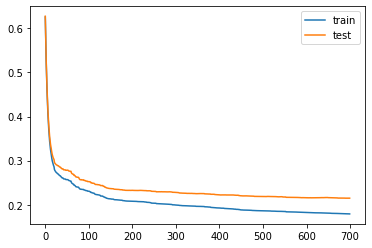

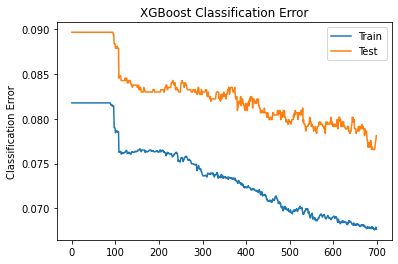

Accuracy: 0.921895
Precision: 0.747253
Recall: 0.194286
F1 score: 0.308390
ROC AUC: 0.593908
[[3532   23]
 [ 282   68]]


In [58]:
#Station 7 model
y = dfbus['o7'].values
y_test, y_pred, model_o7 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.082336	validation_0-logloss:0.62595	validation_1-error:0.087324	validation_1-logloss:0.627085
[1]	validation_0-error:0.082336	validation_0-logloss:0.571927	validation_1-error:0.087324	validation_1-logloss:0.573763
[2]	validation_0-error:0.082336	validation_0-logloss:0.526798	validation_1-error:0.087324	validation_1-logloss:0.529374
[3]	validation_0-error:0.082336	validation_0-logloss:0.490062	validation_1-error:0.087324	validation_1-logloss:0.493186
[4]	validation_0-error:0.082336	validation_0-logloss:0.458375	validation_1-error:0.087324	validation_1-logloss:0.462075
[5]	validation_0-error:0.082336	validation_0-logloss:0.430777	validation_1-error:0.087324	validation_1-logloss:0.43509
[6]	validation_0-error:0.082336	validation_0-logloss:0.407423	validation_1-error:0.087324	validation_1-logloss:0.412469
[7]	validation_0-error:0.082336	validation_0-logloss:0.387973	validation_1-error:0.087324	validation_1-logloss:0.393478
[8]	validation_0-error:0.082336	validation

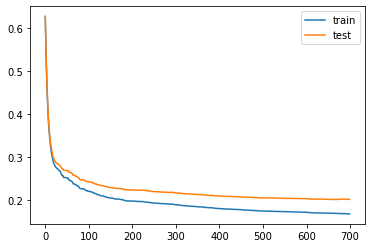

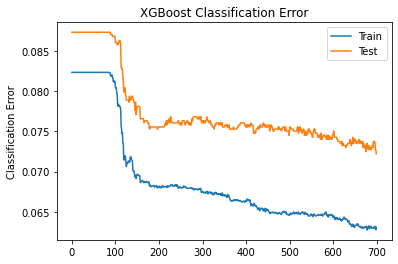

Accuracy: 0.927785
Precision: 0.770642
Recall: 0.246334
F1 score: 0.373333
ROC AUC: 0.619660
[[3539   25]
 [ 257   84]]


In [59]:
#Station 8 model
y = dfbus['o8'].values
y_test, y_pred , model_o8 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.083232	validation_0-logloss:0.625999	validation_1-error:0.083739	validation_1-logloss:0.626532
[1]	validation_0-error:0.083232	validation_0-logloss:0.57166	validation_1-error:0.083739	validation_1-logloss:0.572322
[2]	validation_0-error:0.083232	validation_0-logloss:0.525664	validation_1-error:0.083739	validation_1-logloss:0.526775
[3]	validation_0-error:0.083232	validation_0-logloss:0.488692	validation_1-error:0.083739	validation_1-logloss:0.489827
[4]	validation_0-error:0.083232	validation_0-logloss:0.457181	validation_1-error:0.083739	validation_1-logloss:0.458348
[5]	validation_0-error:0.083232	validation_0-logloss:0.429547	validation_1-error:0.083739	validation_1-logloss:0.431074
[6]	validation_0-error:0.083232	validation_0-logloss:0.405955	validation_1-error:0.083739	validation_1-logloss:0.40793
[7]	validation_0-error:0.083232	validation_0-logloss:0.38695	validation_1-error:0.083739	validation_1-logloss:0.388977
[8]	validation_0-error:0.083232	validation_

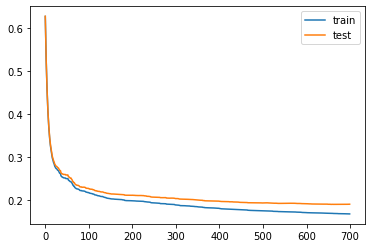

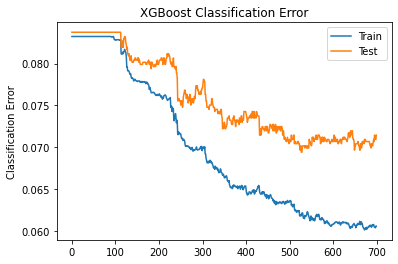

Accuracy: 0.928553
Precision: 0.669014
Recall: 0.290520
F1 score: 0.405117
ROC AUC: 0.638692
[[3531   47]
 [ 232   95]]


In [60]:
#Station 9 model
y = dfbus['o9'].values
y_test, y_pred, model_o9 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.080415	validation_0-logloss:0.625	validation_1-error:0.075032	validation_1-logloss:0.623956
[1]	validation_0-error:0.085025	validation_0-logloss:0.571647	validation_1-error:0.076568	validation_1-logloss:0.56933
[2]	validation_0-error:0.078558	validation_0-logloss:0.525317	validation_1-error:0.072471	validation_1-logloss:0.522155
[3]	validation_0-error:0.085025	validation_0-logloss:0.48864	validation_1-error:0.076568	validation_1-logloss:0.484388
[4]	validation_0-error:0.085025	validation_0-logloss:0.457547	validation_1-error:0.076568	validation_1-logloss:0.45235
[5]	validation_0-error:0.085025	validation_0-logloss:0.429325	validation_1-error:0.076568	validation_1-logloss:0.423342
[6]	validation_0-error:0.082015	validation_0-logloss:0.405787	validation_1-error:0.074008	validation_1-logloss:0.399302
[7]	validation_0-error:0.085025	validation_0-logloss:0.387455	validation_1-error:0.076568	validation_1-logloss:0.380166
[8]	validation_0-error:0.082015	validation_0-l

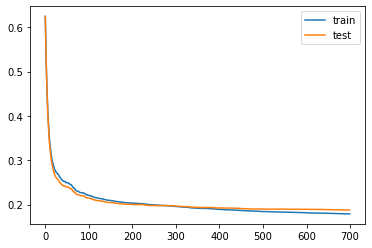

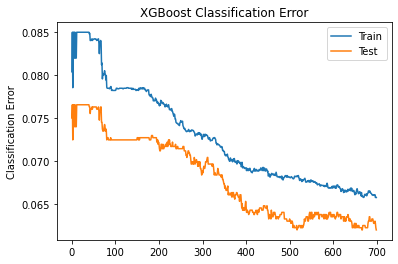

Accuracy: 0.938028
Precision: 0.766355
Recall: 0.274247
F1 score: 0.403941
ROC AUC: 0.633657
[[3581   25]
 [ 217   82]]


In [61]:
#Station 10 model
y = dfbus['o10'].values
y_test, y_pred, model_o10 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.078622	validation_0-logloss:0.624532	validation_1-error:0.081946	validation_1-logloss:0.624842
[1]	validation_0-error:0.082656	validation_0-logloss:0.570557	validation_1-error:0.086044	validation_1-logloss:0.571461
[2]	validation_0-error:0.078814	validation_0-logloss:0.52433	validation_1-error:0.083483	validation_1-logloss:0.525731
[3]	validation_0-error:0.082656	validation_0-logloss:0.486908	validation_1-error:0.086044	validation_1-logloss:0.488728
[4]	validation_0-error:0.082656	validation_0-logloss:0.455324	validation_1-error:0.086044	validation_1-logloss:0.457589
[5]	validation_0-error:0.082656	validation_0-logloss:0.427973	validation_1-error:0.086044	validation_1-logloss:0.430646
[6]	validation_0-error:0.082656	validation_0-logloss:0.404126	validation_1-error:0.086044	validation_1-logloss:0.406937
[7]	validation_0-error:0.082656	validation_0-logloss:0.384847	validation_1-error:0.086044	validation_1-logloss:0.38809
[8]	validation_0-error:0.082656	validation

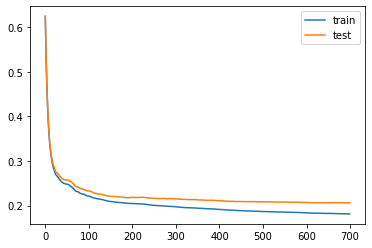

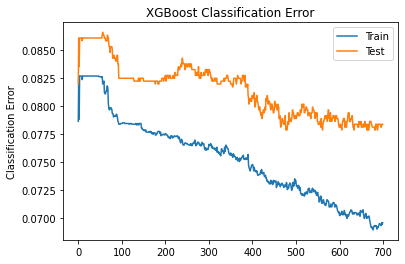

Accuracy: 0.921639
Precision: 0.653061
Recall: 0.190476
F1 score: 0.294931
ROC AUC: 0.590475
[[3535   34]
 [ 272   64]]


In [62]:
#Station 11 model
y = dfbus['o11'].values
y_test, y_pred, model_o11 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.0824	validation_0-logloss:0.625692	validation_1-error:0.077337	validation_1-logloss:0.624908
[1]	validation_0-error:0.084512	validation_0-logloss:0.572087	validation_1-error:0.078617	validation_1-logloss:0.570459
[2]	validation_0-error:0.084512	validation_0-logloss:0.5262	validation_1-error:0.078617	validation_1-logloss:0.524145
[3]	validation_0-error:0.084512	validation_0-logloss:0.489117	validation_1-error:0.078617	validation_1-logloss:0.486279
[4]	validation_0-error:0.084512	validation_0-logloss:0.458227	validation_1-error:0.078617	validation_1-logloss:0.454792
[5]	validation_0-error:0.084512	validation_0-logloss:0.430621	validation_1-error:0.078617	validation_1-logloss:0.426987
[6]	validation_0-error:0.084512	validation_0-logloss:0.407089	validation_1-error:0.078617	validation_1-logloss:0.40328
[7]	validation_0-error:0.084512	validation_0-logloss:0.38779	validation_1-error:0.078617	validation_1-logloss:0.383485
[8]	validation_0-error:0.084512	validation_0-l

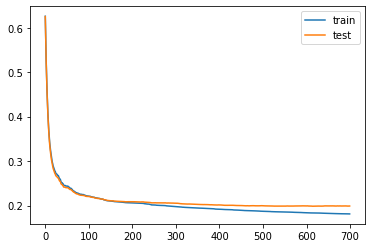

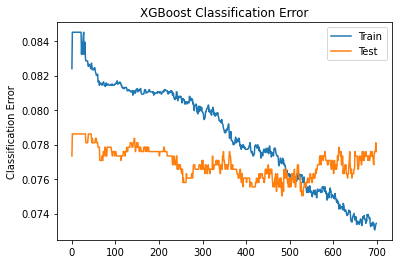

Accuracy: 0.922407
Precision: 0.533333
Recall: 0.104235
F1 score: 0.174387
ROC AUC: 0.548226
[[3570   28]
 [ 275   32]]


In [63]:
#Station 12 model
y = dfbus['o12'].values
y_test, y_pred, model_o12 = myModel(X , y)
stat(y_test, y_pred)

[0]	validation_0-error:0.081503	validation_0-logloss:0.625261	validation_1-error:0.082202	validation_1-logloss:0.625364
[1]	validation_0-error:0.083104	validation_0-logloss:0.571633	validation_1-error:0.084251	validation_1-logloss:0.571901
[2]	validation_0-error:0.083104	validation_0-logloss:0.525334	validation_1-error:0.084251	validation_1-logloss:0.525759
[3]	validation_0-error:0.083104	validation_0-logloss:0.488285	validation_1-error:0.084251	validation_1-logloss:0.489036
[4]	validation_0-error:0.083104	validation_0-logloss:0.456915	validation_1-error:0.084251	validation_1-logloss:0.457826
[5]	validation_0-error:0.083104	validation_0-logloss:0.428569	validation_1-error:0.084251	validation_1-logloss:0.429712
[6]	validation_0-error:0.083104	validation_0-logloss:0.404212	validation_1-error:0.084251	validation_1-logloss:0.405544
[7]	validation_0-error:0.083104	validation_0-logloss:0.385177	validation_1-error:0.084251	validation_1-logloss:0.386732
[8]	validation_0-error:0.083104	validati

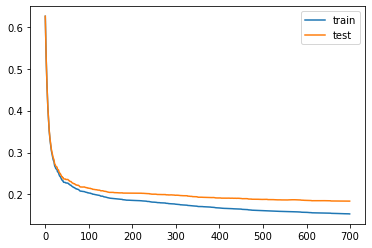

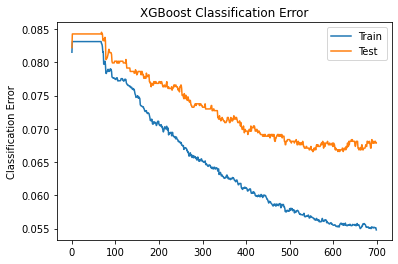

Accuracy: 0.932138
Precision: 0.746154
Recall: 0.294833
F1 score: 0.422658
ROC AUC: 0.642802
[[3543   33]
 [ 232   97]]


In [64]:
#Station 13 model
y = dfbus['o13'].values
y_test, y_pred, model_o13 = myModel(X , y)
stat(y_test, y_pred)

#Final model Running and Results

In [67]:
#df for all predicted data
df_predicted = pd.DataFrame(columns=['WeekDay','Hours','Minutes','Seconds','Line','Station'])
#fill the time inputs and station number which you need
hour = 16
minutes = 25
station = 9
df_pred = findDFtime(hour,minutes,station)
df_pred

16 39 1 11
16 39 10 11
16 39 33 11
16 39 37 11
1


,WeekDay,Hours,Minutes,Seconds,Line,Station
1,Tue,16,39,10,921,11


In [68]:
#real data to equal with predicted data
dfbus.loc[(dfbus['o'+str(station)] == 1) & (dfbus['A_Hours'] == hour)  & (dfbus['WeekDay'] == 'Tue')]

,WeekDay,A_Hours,A_Minutes,A_Seconds,PublishedLineName,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,Mon,Sun,Thu,Tue,Wed
6261,Tue,16,19,41,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6273,Tue,16,19,48,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6285,Tue,16,19,52,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6297,Tue,16,19,49,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6309,Tue,16,20,25,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6321,Tue,16,20,48,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6333,Tue,16,42,1,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6345,Tue,16,41,25,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6357,Tue,16,41,26,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6369,Tue,16,41,55,921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
